# Problem Statement

In the healthcare domain, accurate identification of chronic kidney disease (CKD) is crucial for timely intervention and treatment. As part of a medical diagnostic initiative, we aim to develop a machine learning model to predict the likelihood of an individual having CKD based on various health attributes and medical test results.


# Dataset Features:

Age (numeric): Age of the patient.

Blood Pressure (bp): Blood pressure measurement.

Specific Gravity (sg): Specific gravity of urine.

Albumin (al): Presence of albumin in urine.

Sugar (su): Presence of sugar in urine.

Red Blood Cells (rbc): Presence of red blood cells in urine.

Pus Cell (pc): Presence of pus cells in urine.

Pus Cell Clumps (pcc): Presence of pus cell clumps.

Bacteria (ba): Presence of bacteria.

Blood Glucose Random (bgr): Random blood glucose measurement.

Hemoglobin (hemo): Hemoglobin level in blood.

Packed Cell Volume (pcv): Volume percentage of red cells in blood.

White Blood Cell Count (wbcc): Count of white blood cells.

Red Blood Cell Count (rbcc): Count of red blood cells.

Hypertension (htn): Presence of hypertension.

Diabetes Mellitus (dm): Presence of diabetes mellitus.

Coronary Artery Disease (cad): Presence of coronary artery disease.

Appetite: Appetite status.

Pedal Edema (pe): Presence of pedal edema.

Anemia (ane): Presence of anemia.

Target Variable:
Class (y): Indicates whether the patient has chronic kidney disease ('ckd') or not.


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [58]:
# Data Loading
dataset_name = 'chronic_kidney_disease.csv'
Ckd = pd.read_csv(dataset_name)

In [59]:
 Ckd.tail(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
390,52,80,1.025,0,0,0,0,1,1,99,...,52,6300,5.3,1,1,1,1,1,1,notckd
391,36,80,1.025,0,0,0,0,1,1,85,...,44,5800,6.3,1,1,1,1,1,1,notckd
392,57,80,1.02,0,0,0,0,1,1,133,...,46,6600,5.5,1,1,1,1,1,1,notckd
393,43,60,1.025,0,0,0,0,1,1,117,...,54,7400,5.4,1,1,1,1,1,1,notckd
394,50,80,1.02,0,0,0,0,1,1,137,...,45,9500,4.6,1,1,1,1,1,1,notckd
395,55,80,1.02,0,0,0,0,1,1,140,...,47,6700,4.9,1,1,1,1,1,1,notckd
396,42,70,1.025,0,0,0,0,1,1,75,...,54,7800,6.2,1,1,1,1,1,1,notckd
397,12,80,1.02,0,0,0,0,1,1,100,...,49,6600,5.4,1,1,1,1,1,1,notckd
398,17,60,1.025,0,0,0,0,1,1,114,...,51,7200,5.9,1,1,1,1,1,1,notckd
399,58,80,1.025,0,0,0,0,1,1,131,...,53,6800,6.1,1,1,1,1,1,1,notckd


In [60]:
Ckd.shape

(400, 25)

In [61]:
Ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    object 
 1   bp      400 non-null    object 
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    object 
 10  bu      400 non-null    object 
 11  sc      400 non-null    object 
 12  sod     400 non-null    object 
 13  pot     400 non-null    object 
 14  hemo    400 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [68]:
# Data Preprocessing
Ckd = Ckd.drop_duplicates(keep='first')

In [69]:

Ckd = Ckd .replace('?', np.nan)

y = Ckd ['class']
X = Ckd .iloc[:, 0:24]

knn_missing_values_imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(knn_missing_values_imputer.fit_transform(X),
                               columns=X.columns)


Class 0: 250
Class 1: 150
Proportion of class 0 is  62.5 %


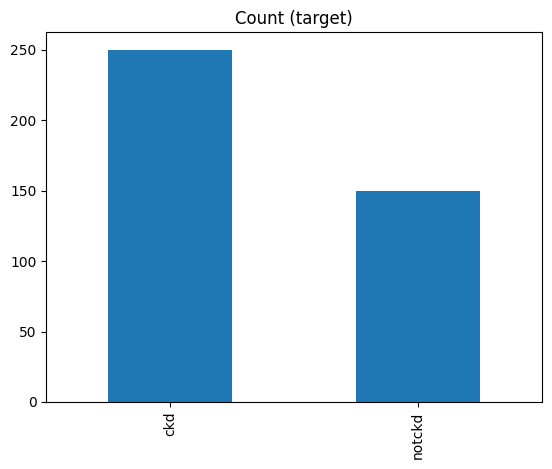

In [70]:
target_count = Ckd['class'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
target_count.plot(kind='bar', title='Count (target)');

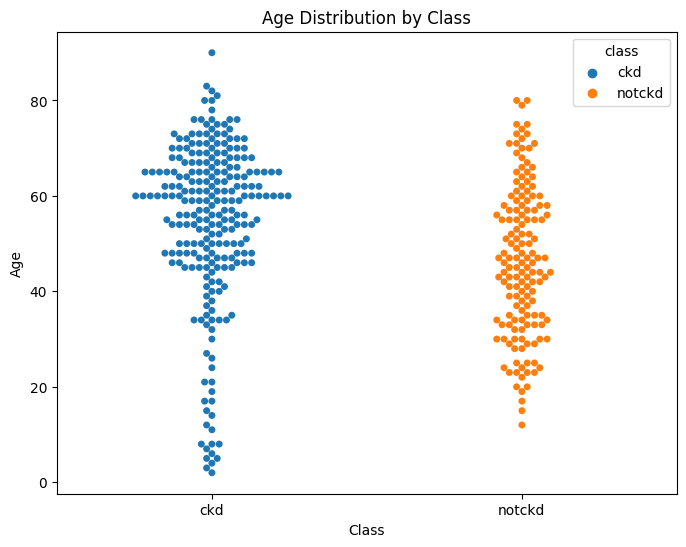

In [91]:
#Swarm Plot
#bbA swarm plot displays individual data points, providing a better understanding of the spread of ages
plt.figure(figsize=(8, 6))
sns.swarmplot(data=Ckd, x='class', y='age', hue='class')
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


In [72]:
target_label_encoder = LabelEncoder()
y = target_label_encoder.fit_transform(y)

# Splitting into Training and Testing Sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)


In [73]:
standard_feature_scaler = StandardScaler()
X = pd.DataFrame(standard_feature_scaler.fit_transform(X),
                               columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc',
                                        'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot',
                                        'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm',
                                        'cad', 'appet', 'pe', 'ane'])



Evaluating Logistic Regression Model:
Precision: 0.9459459459459459
Accuracy: 0.9625
Recall: 0.9722222222222222
F1-score: 0.9589041095890412
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.95      0.97      0.96        36

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

Confusion Matrix:
 [[42  2]
 [ 1 35]]


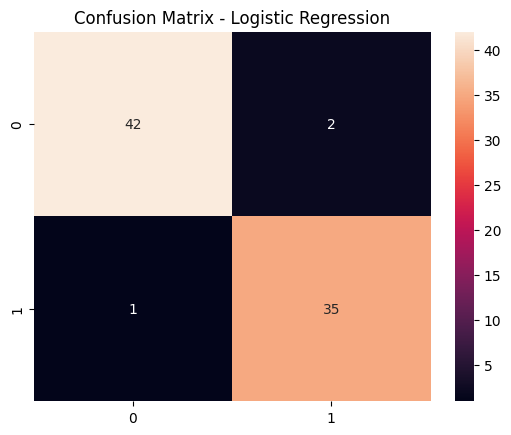

In [74]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
logistic.score(X_train,y_train)
y_pred = logistic.predict(X_test)
# Print evaluation metrics for Logistic Regression
print("\nEvaluating Logistic Regression Model:")
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1-score:', metrics.f1_score(y_test, y_pred))
print('Classification Report:\n', metrics.classification_report(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Plot confusion matrix for Logistic Regression
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Evaluating Decision Tree Model:
Precision: 0.8536585365853658
Accuracy: 0.9125
Recall: 0.9722222222222222
F1-score: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.92        44
           1       0.85      0.97      0.91        36

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

Confusion Matrix:
 [[38  6]
 [ 1 35]]


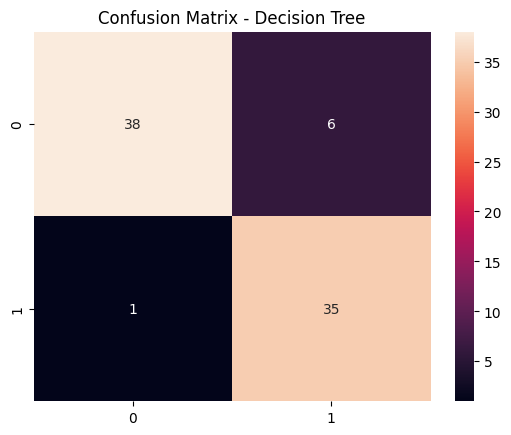

In [47]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)
# Print evaluation metrics for Decision Tree
print("\nEvaluating Decision Tree Model:")
print('Precision:', metrics.precision_score(y_test, dt_predictions))
print('Accuracy:', metrics.accuracy_score(y_test, dt_predictions))
print('Recall:', metrics.recall_score(y_test, dt_predictions))
print('F1-score:', f1_score(y_test, dt_predictions))
print('Classification Report:\n', metrics.classification_report(y_test, dt_predictions))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, dt_predictions))

# Plot confusion matrix for Decision Tree
sns.heatmap(metrics.confusion_matrix(y_test, dt_predictions), annot=True)
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Evaluating Random Forest Model:
Precision: 0.9722222222222222
Accuracy: 0.975
Recall: 0.9722222222222222
F1-score: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.97      0.97      0.97        36

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

Confusion Matrix:
 [[43  1]
 [ 1 35]]
ROC AUC Score: 0.9747474747474748


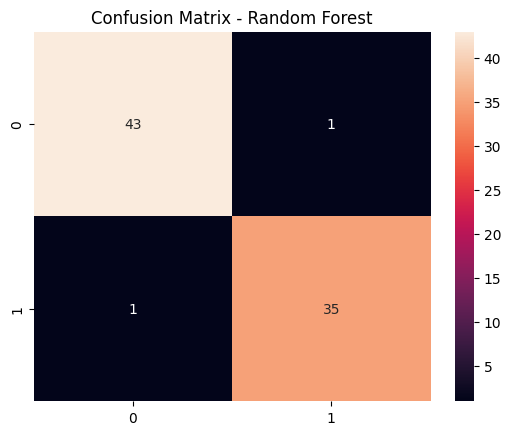

In [48]:
# Random Forest
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
# Print evaluation metrics for Random Forest
print("\nEvaluating Random Forest Model:")
print('Precision:', metrics.precision_score(y_test, rf_predictions))
print('Accuracy:', metrics.accuracy_score(y_test, rf_predictions))
print('Recall:', metrics.recall_score(y_test, rf_predictions))
print('F1-score:', metrics.f1_score(y_test, rf_predictions))
print('Classification Report:\n', metrics.classification_report(y_test, rf_predictions))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, rf_predictions))
print('ROC AUC Score:', roc_auc_score(y_test, rf_predictions))
# Plot confusion matrix for Random Forest
sns.heatmap(metrics.confusion_matrix(y_test, rf_predictions), annot=True)
plt.title('Confusion Matrix - Random Forest')
plt.show()


Evaluating Gradient Boosting Model:
Precision: 0.9722222222222222
Accuracy: 0.975
Recall: 0.9722222222222222
F1-score: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.97      0.97      0.97        36

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

Confusion Matrix:
 [[43  1]
 [ 1 35]]
ROC AUC Score: 0.9747474747474748


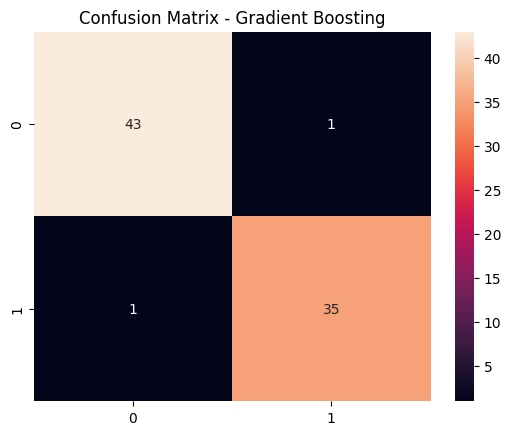

In [50]:
# Create a Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=0)
# Train the classifier
gradient_boosting.fit(X_train, y_train)
# Make predictions on the test set
gb_predictions = gradient_boosting.predict(X_test)
# Print evaluation metrics for Gradient Boosting
print("\nEvaluating Gradient Boosting Model:")
print('Precision:', metrics.precision_score(y_test, gb_predictions))
print('Accuracy:', metrics.accuracy_score(y_test, gb_predictions))
print('Recall:', metrics.recall_score(y_test, gb_predictions))
print('F1-score:', metrics.f1_score(y_test, gb_predictions))
print('Classification Report:\n', metrics.classification_report(y_test, gb_predictions))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, gb_predictions))
print('ROC AUC Score:', roc_auc_score(y_test, gb_predictions))

# Plot confusion matrix for Gradient Boosting
sns.heatmap(metrics.confusion_matrix(y_test, gb_predictions), annot=True)
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()